# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [3]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [4]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [5]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [6]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


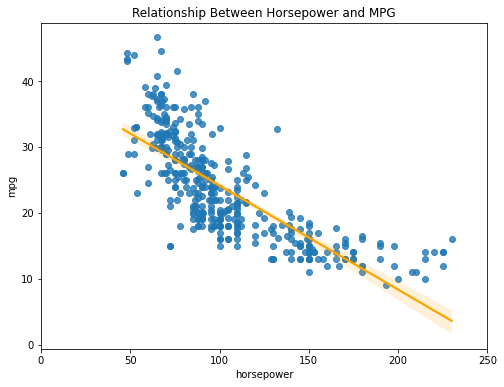

In [7]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [8]:
# call_on_students(1)

#### Answer: 

- The residual sum of squares (RSS) calculates the degree of variance in a regression model. It estimates the level of error in the model's prediction. which is on the y axis. X-axis is the slope. 
- From this graph you can see that it arrived at about m = -0.158 for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest
- goal is to get as close to 0 as possible, that value would be the optimal weight or value


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [9]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [10]:
# call_on_students(1)

#### Answer: 

- Step size captures the amount to change the coefficient as it tries to minimize the error term, as you get closer to 0 the steps get smaller. 
- to minimize the error you're going to the opposite of the gradient.
- Learning rate determines how large those steps are to start.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [11]:
# call_on_students(1)

#### Answer: 

1. Logistic regression can be used only with two types of target variables: A categorical target variable that has exactly two categories (i.e., a binary or dichotomous variable). A continuous target variable that has values in the range 0.0 to 1.0 representing probability values or proportions.

2. Log-odds, which are translated into probabilities to predict the class

3. Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical.

4. parametric, if it has some type of assumptions in regards to distributions or have a finite number of parameters. 

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [12]:
# call_on_students(1)

#### Answer: 

- Benefit: simple to interpret, fits quickly, not prone to overfitting. One may consider Regularization (L1 and L2) techniques to avoid over-fitting in high dimensional datasets.
- Another model might be more useful if the target is imbalanced, or if there are interaction terms in the data


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [13]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [14]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [15]:
# call_on_students(1)

In [16]:
# Train-test split
X = mpg_class.drop(columns='target')
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Set test_size=0.33 and random_state=42


In [17]:
# Scale the data
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [18]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [19]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- You can see that 74% would mean the target is imbalanced


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- predicting only the majority class, 0


#### Part 3: How accurate would that baseline be on test data?


In [20]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 75% accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [21]:
# call_on_students(1)

#### Answer:

- Target is imbalanced
- Oversampling, synthetic oversampling (SMOTE), set class_weight, stratify (keeps target distribution same in train/test)
- Note that undersampling doesn't make sense here, since our dataset is so small


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [22]:
# call_on_students(1)

In [23]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

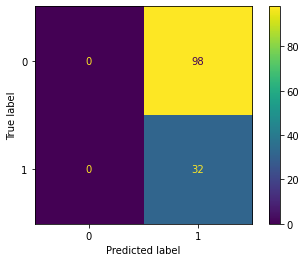

In [24]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [25]:
# call_on_students(1)

In [26]:
# Grab predictions if using sklearn functions
test_preds = logreg.predict(X_test_scaled)

In [27]:
# Accuracy
# By hand: TP + TN / TP + TN + FP + FN
#accuracy = (32 + 98) / (32 + 98 + 0 + 0)
#print(accuracy)

# Using sklearn
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)

0.9230769230769231


In [28]:
# Precision
# By hand: TP / TP + FP
#precision = 23 / (23 + 1)
#print(precision)

# Using sklearn
precision = precision_score(y_test, test_preds)
print(precision)

0.9583333333333334


In [29]:
# Recall
# By hand: TP / TP + FN
#recall = 23 / (23 + 9)
#print(recall)

# Using sklearn
recall = recall_score(y_test, test_preds)
print(recall)

0.71875


In [30]:
# F1-Score
# By hand
#f1score = 2 * precision * recall / (precision + recall)
#print(f1score)

# Using sklearn
f1score = f1_score(y_test, test_preds)
print(f1score)

0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [31]:
# call_on_students(1)

In [32]:
# Calculate roc-auc
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.9811862244897959

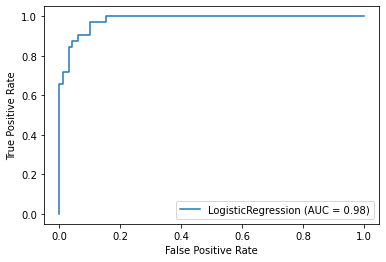

In [33]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [34]:
# call_on_students(1)

#### Answer:

- Doing well! Very high metrics all around - more FN than FP (better precision than recall)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [47]:
# Create two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Train the two trees on different columns

# First fit dt_maxdepth1_v1 on 'weight', set it equal to dt_weight
dt_weight = dt_maxdepth1_v1.fit(X_train[['weight']], y_train)

# Then fit dt_maxdepth1_v2 on 'origin', set it equal to dt_origin
dt_origin = dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

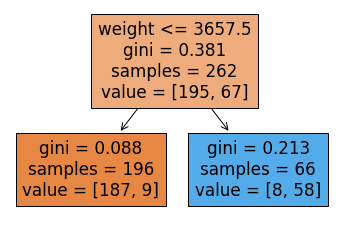

In [48]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

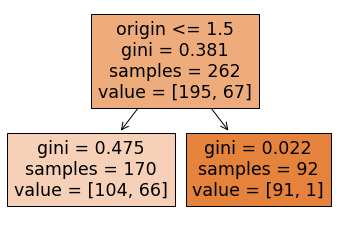

In [49]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [45]:
# call_on_students(1)

#### Answer:
- The first DT produces more pure splits, thus is doing a better job of separating the data

In [50]:
# If you want to check on your answer, let's try out just the default .score() for the models here.
print(dt_weight.score(X_test[['weight']], y_test))

print(dt_origin.score(X_test[['origin']], y_test))


0.9307692307692308
0.7538461538461538


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [51]:
# call_on_students(1)

In [52]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

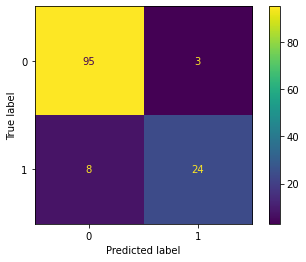

In [53]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

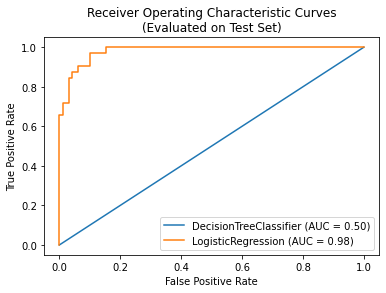

In [54]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic regression has the higher roc-auc score, and has more area under the curve since it's closer to the top left corner of the graph
